# Teoría de Circuitos II

# Trabajo semanal 9
#### 

Parte 1 - Diseño de filtros

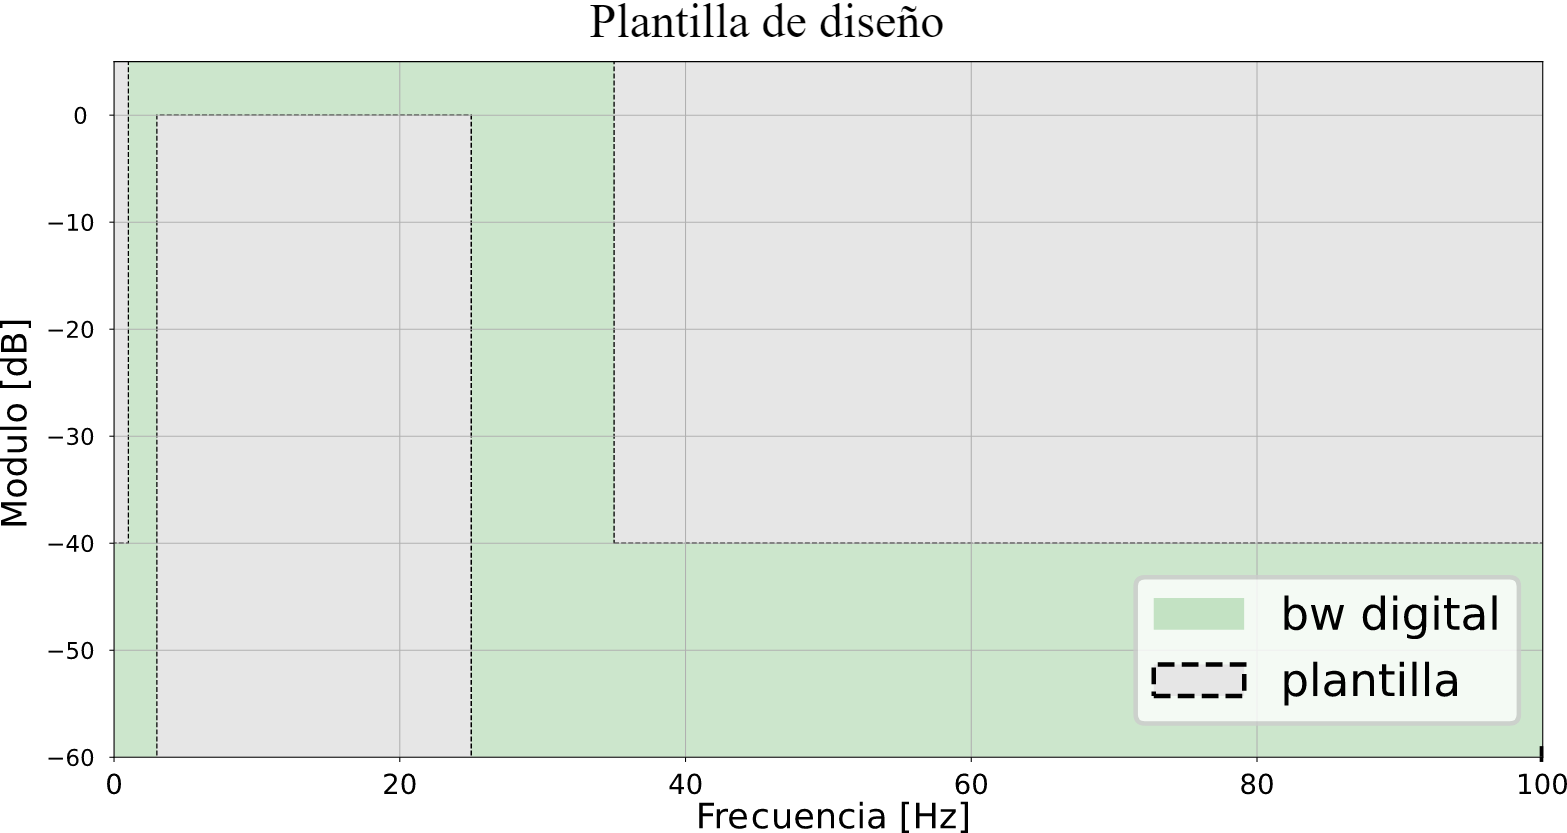

Se necesita eliminar las interferencias de una señal electrocardiográfica (ECG) que fue registrada a una frecuencia de muestreo de 1 kHz. Para ello se propone la siguiente plantilla de diseño:

y se pide diseñar dos filtros: uno IIR y otro FIR que cumplan con la plantilla, utilizando alguno de los métodos estudiados. Mostrar la respuesta en frecuencia, para ambos filtros, de:

a) módulo,

b) fase

c) retardo

d) y respuesta al impulso.


Filtro IIR:


Modulo:

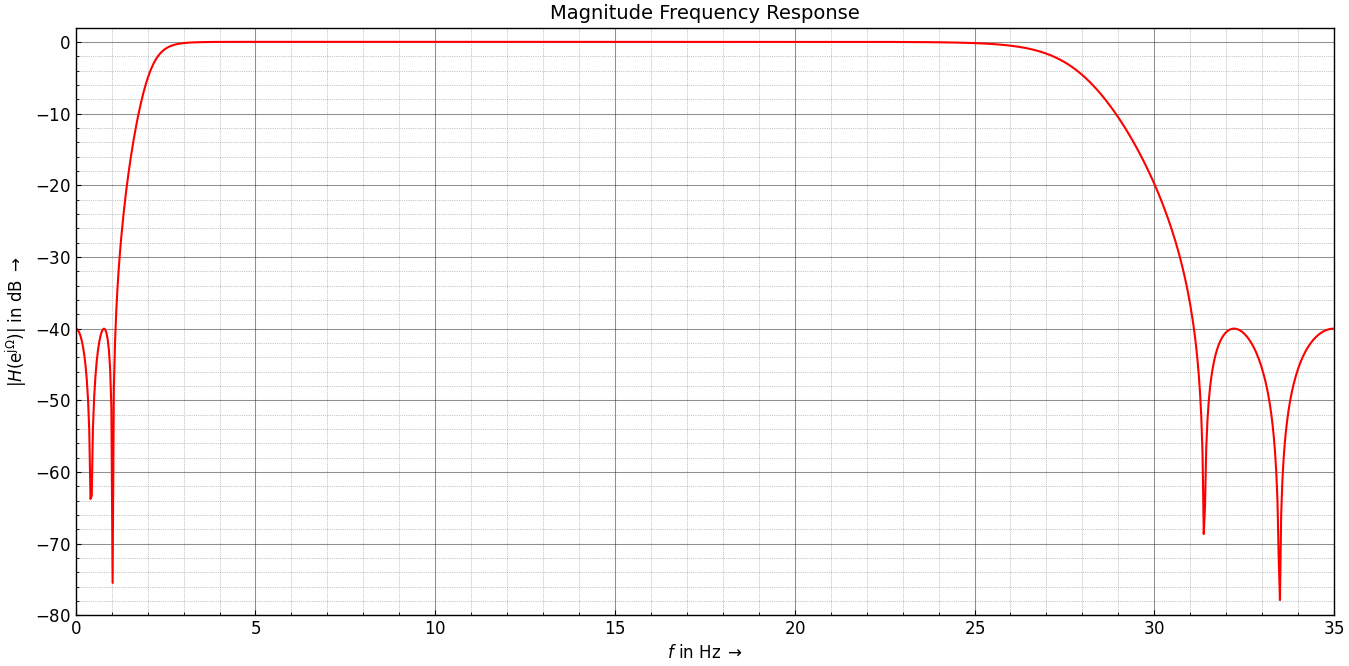

![Respuesta_IIR_Fs150.png](./Respuesta_IIR_Fs150.png)

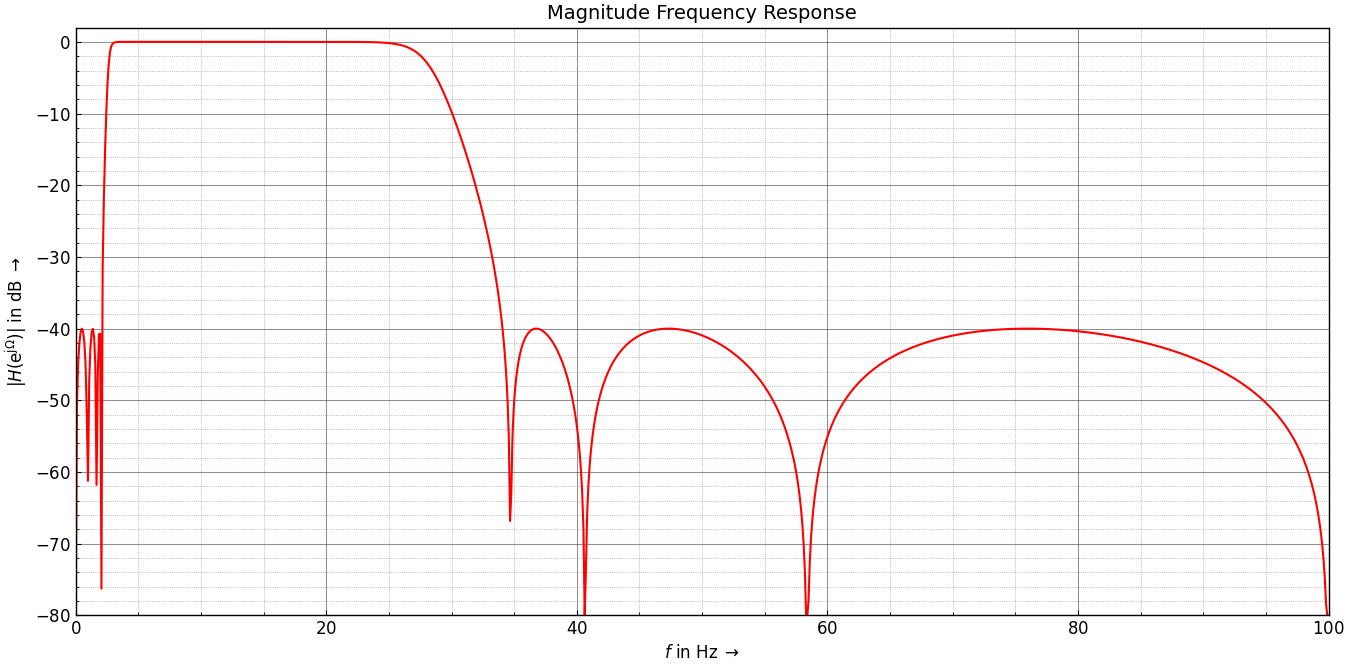

![Respuesta_IIR_Fs1000.png](./Respuesta_IIR_Fs1000.png)

Se grafica el modulo en 4 frecuencias distintas y se observa que para las primeras (70 hasta 200) cumple la plantilla solicitada, mientras que para la de 1000 que es la solicitida no cumple

Fase:
![Fase_IIR_Fs70.png](./Fase_IIR_Fs70.png)

![Fase_IIR_Fs200.png](./Fase_IIR_Fs200.png)

![Fase_IIR_Fs1000.png](./Fase_IIR_Fs1000.png)

Retardo:

![Delay_IIR_Fs70.png](./Delay_IIR_Fs70.png)

![Delay_IIR_Fs200.png](./Delay_IIR_Fs200.png)

![Delay_IIR_Fs1000.png](./Delay_IIR_Fs1000.png)


Respuesta el impulso:

![Respuesta_Impulso_IIR_Fs200.png](./Respuesta_Impulso_IIR_Fs200.png)

![Respuesta_Impulso_IIR_Fs1000.png](./Respuesta_Impulso_IIR_Fs1000.png)

Filtro FIR:

Se obsterva que el orden del filtro Fir es mucho mas elevado (Aprox 10 veces mayor) que el del IIR
Modulo:
A frecuencia :150
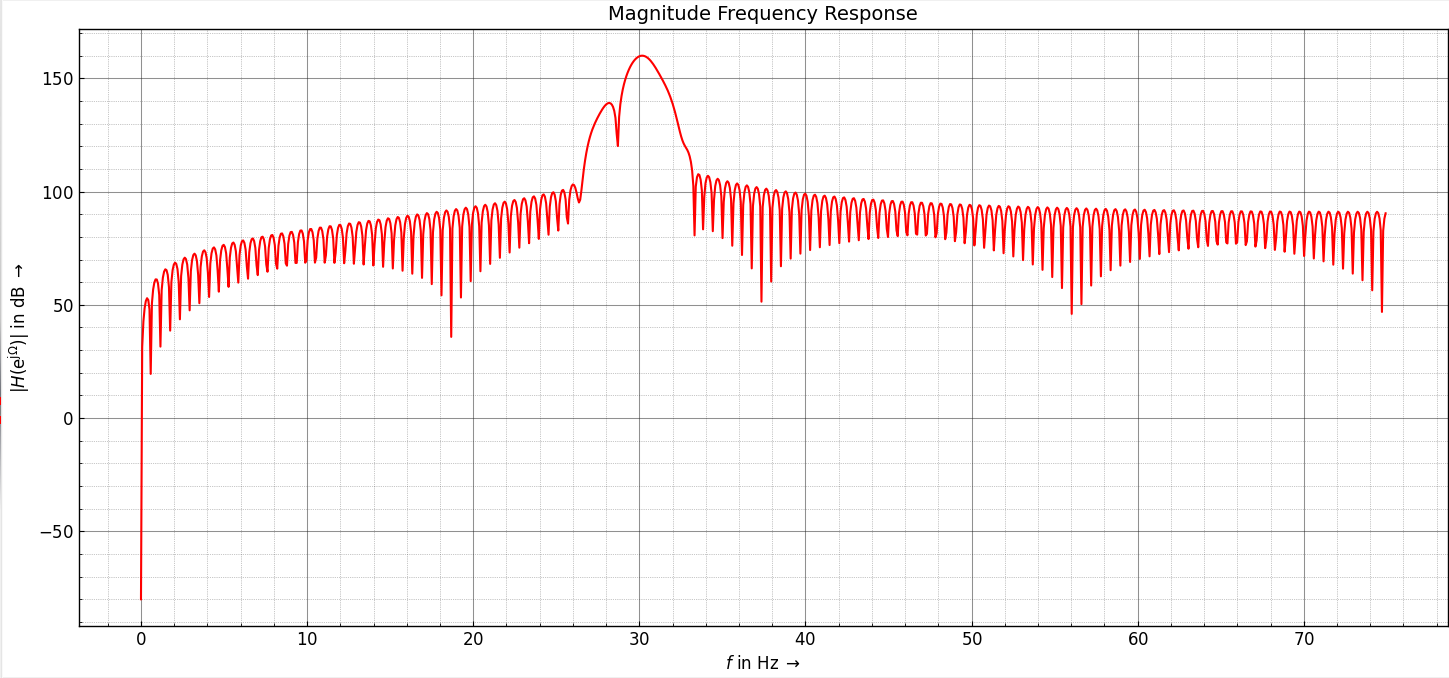


A frecuencia :1000

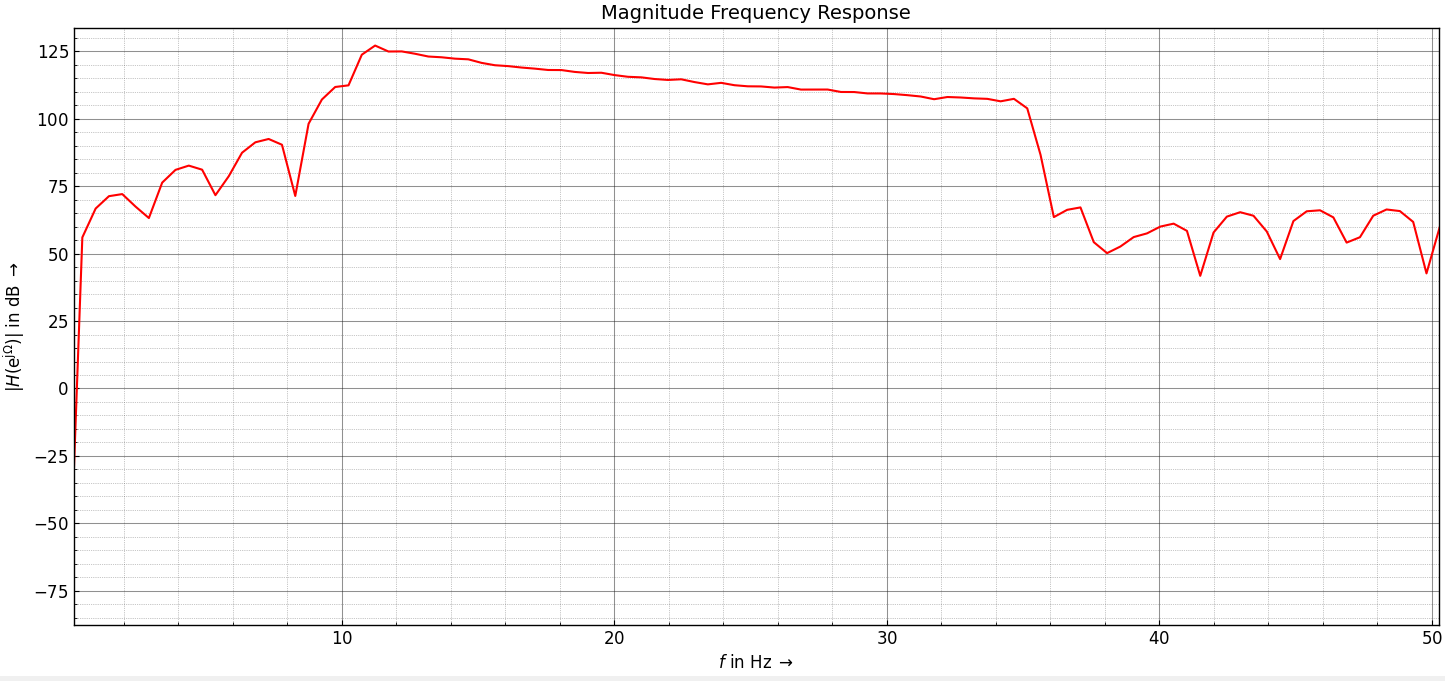



Fase:

A frecuencia :150
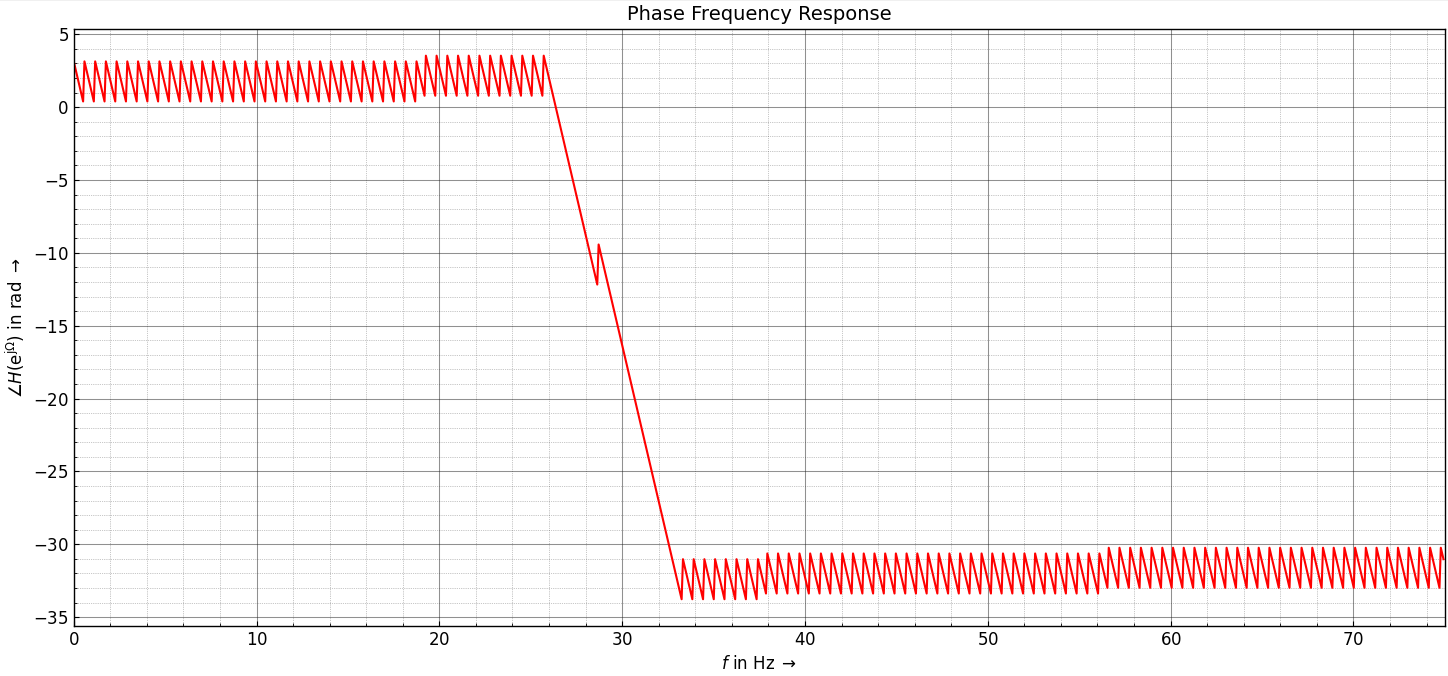

A frecuencia :1000
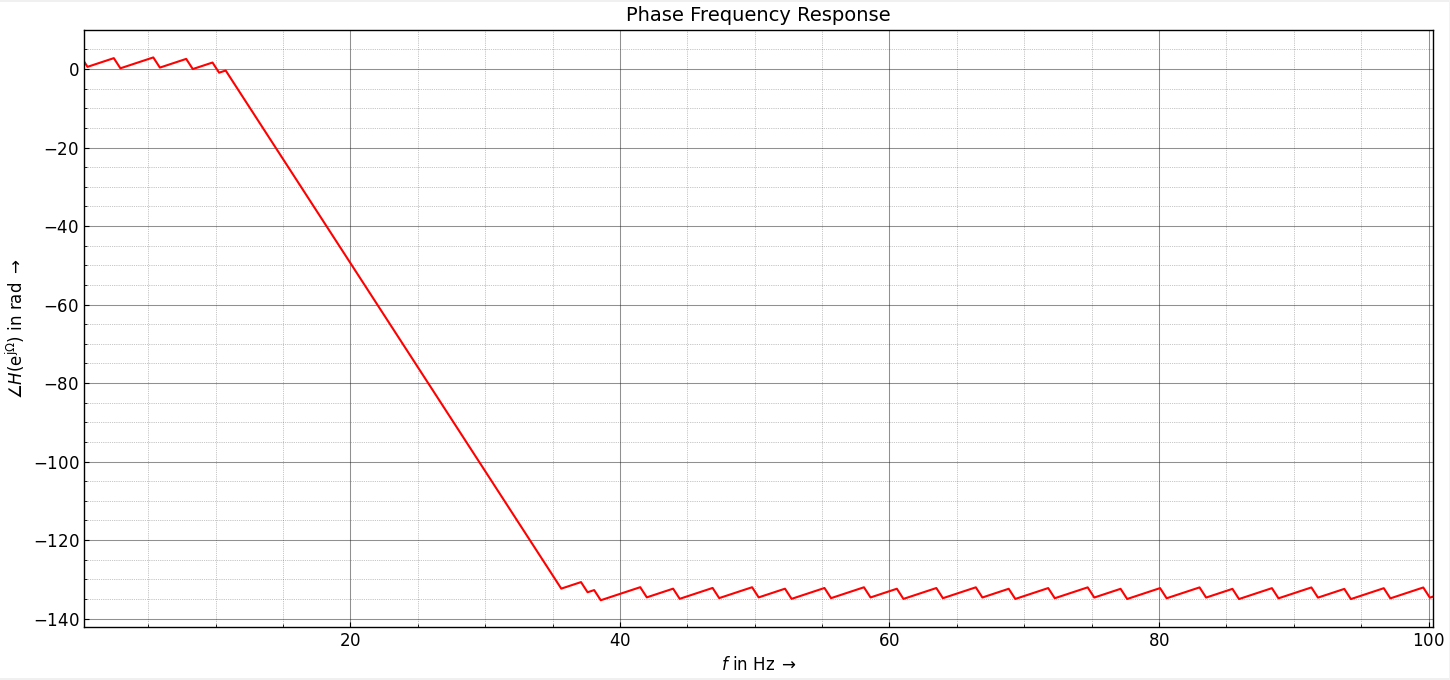

Retardo:

A frecuencia :150
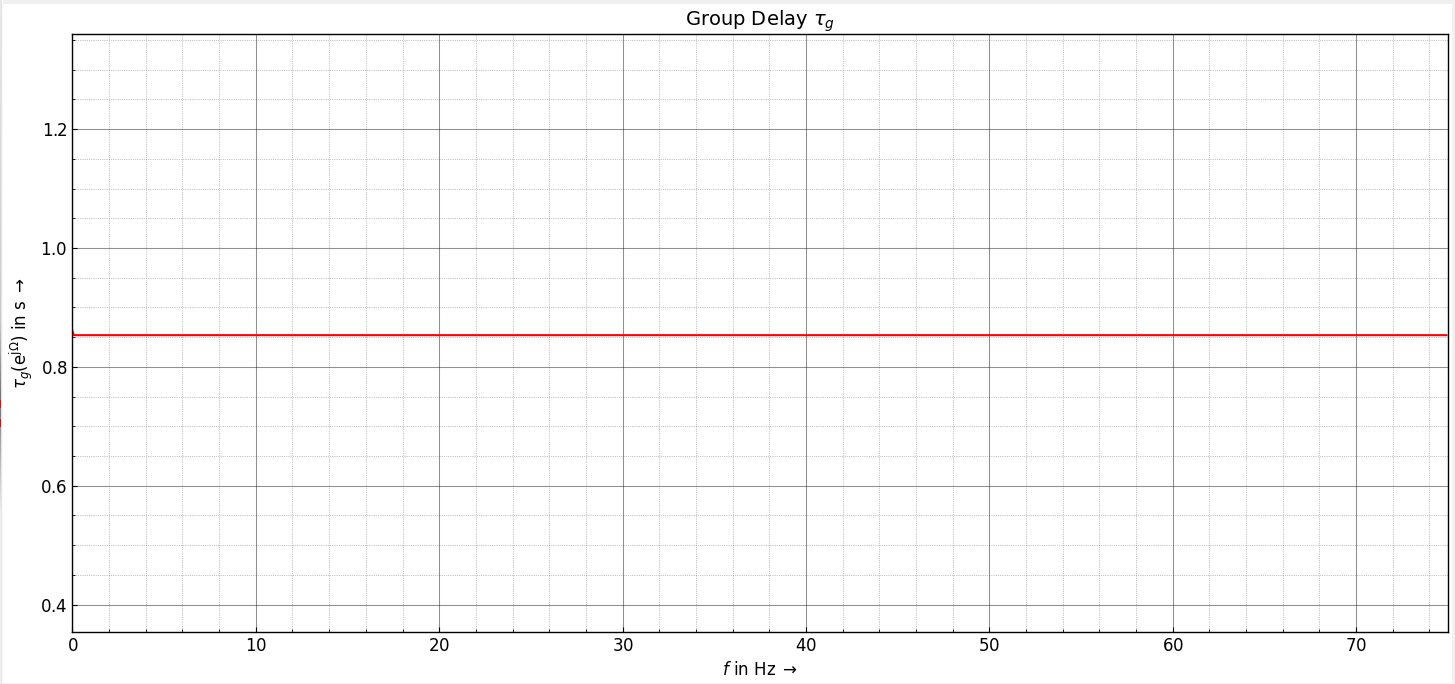

A frecuencia :1000
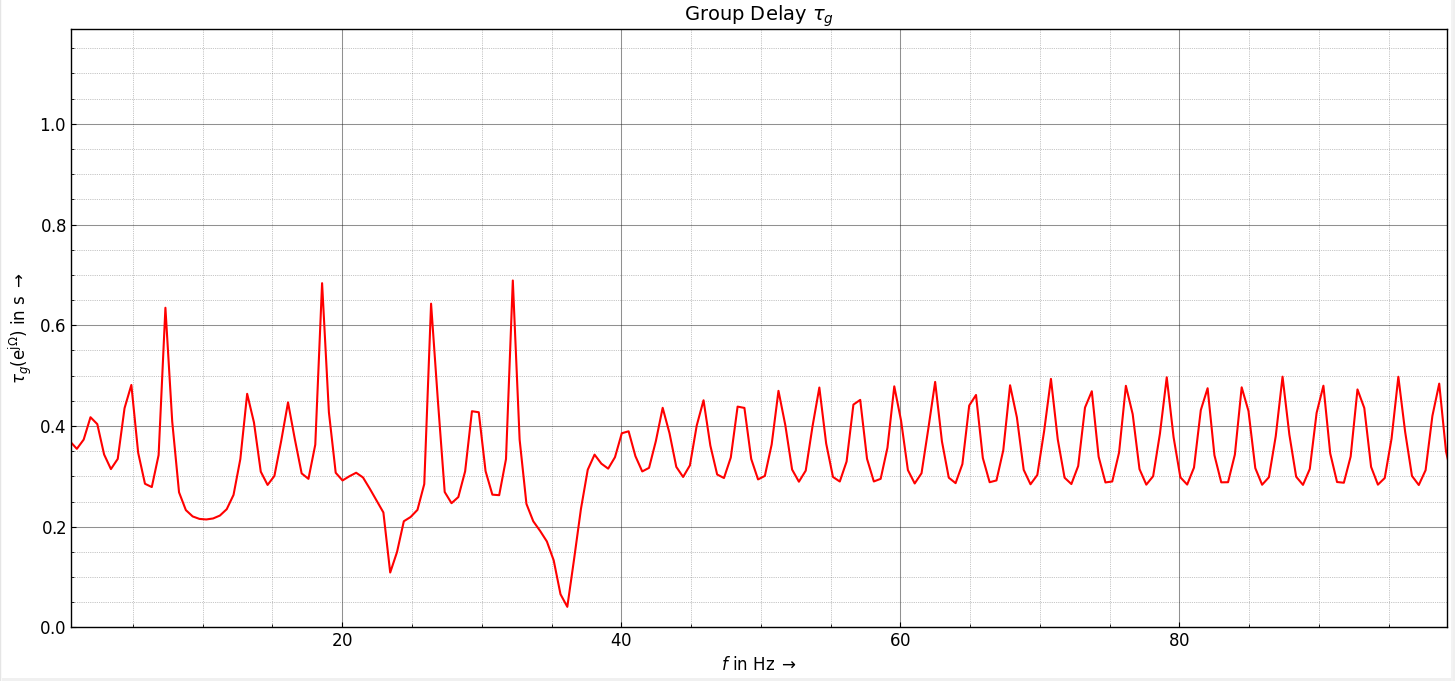

Respuesta al impulso:

A frecuencia :150
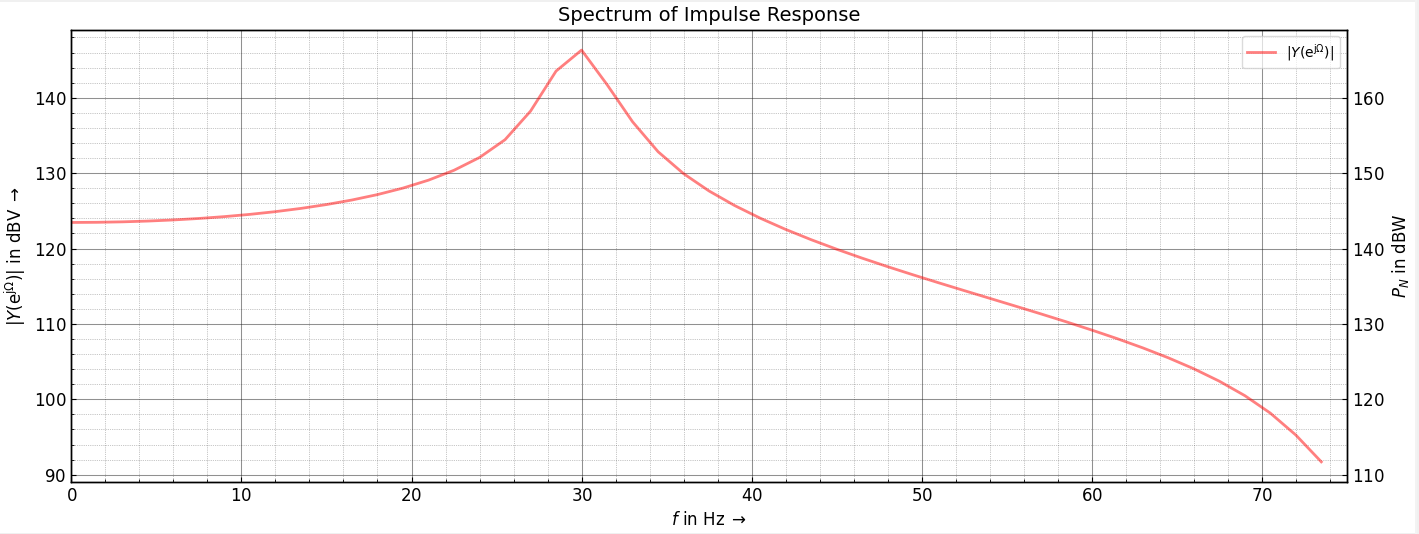

A frecuencia :1000

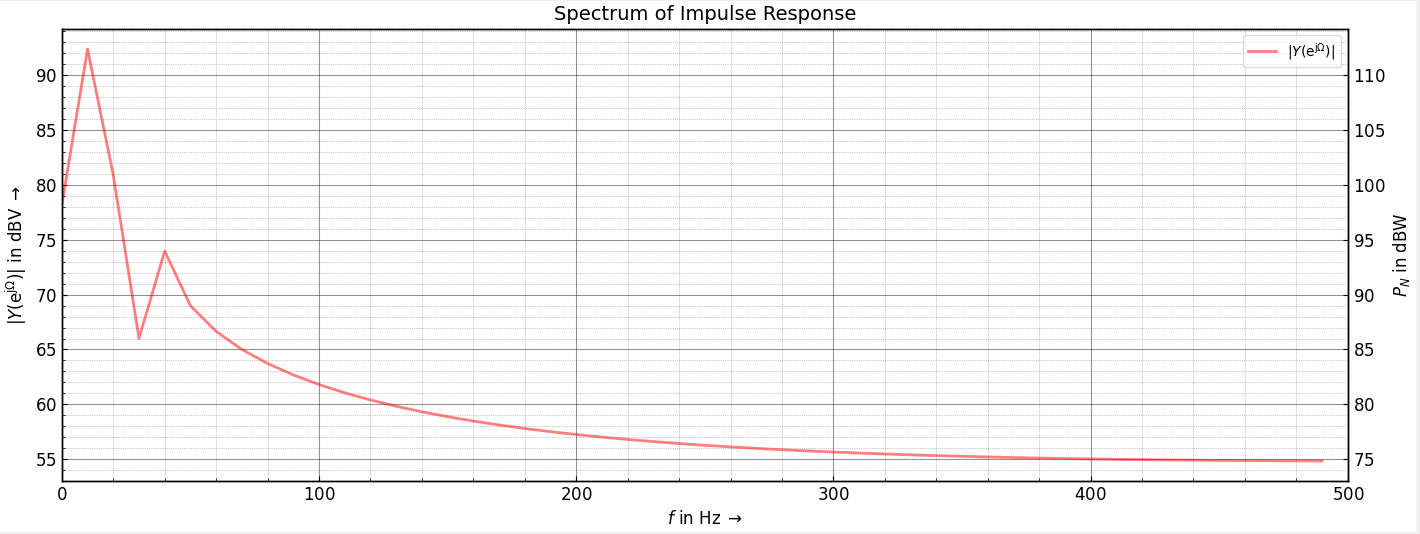

In [1]:
# Parte 2

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2

In [2]:
# Plantilla

# filter design
ripple = 0 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)